# Regresión lineal con descenso del gradiente

Tomado de [acá](https://jairiidriss.medium.com/gradient-descent-algorithm-from-scratch-using-python-2b36c1548917) 

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression

Generamos uno conjunto de puntos $\lbrace (x_i, y_i) \rbrace$ con una tendencia. La variable $y$ depende de la variable $x$.

In [2]:
x,y = make_regression(n_features=1, n_targets=1, n_samples=300, noise=30, random_state=4)

Veremos cómo son.

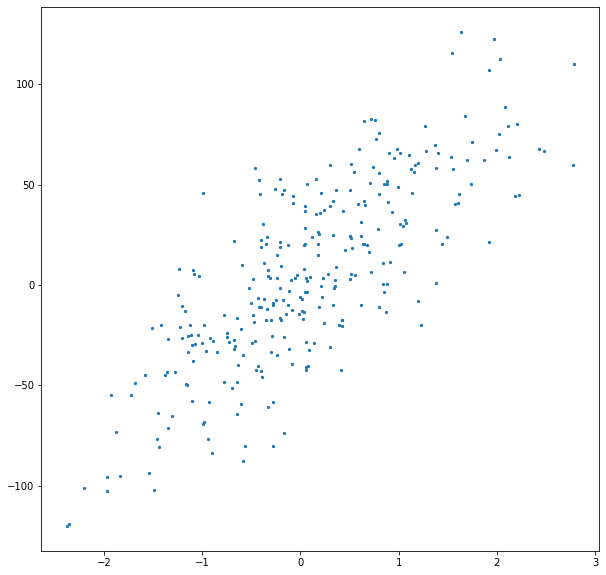

In [4]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x,y, s=5)

## Descenso del grandiente 


Vamos a asumir que nuestros datos se explican a través de una relación lineal

$$
y_{\theta}(x) = \theta_0 + \theta_1 x = <(\theta_0, \theta_1),(1,x) >
$$

donde $\theta_1$ es la pendiente que indica cuando aumenta la variable de respuesta respecto de la variable de entrada y $\theta_0$ especifica la ordenada al origen.

La expresión general del descenso del gradiente es:

$$
{\bf{\theta}}(t+1) = \theta(t) - \eta \nabla E
$$

que especifica un proceso iterado en el que los valores de los parámetros $\theta$ se van a actualizar dependiendo de la dirección contraria en la que aumenta la función $E$

La función de error que debemos derivar es el MSE:

$$
\begin{array}{ll}
E  &= \frac{1}{m} \sum_i^m (y_{\theta}(x) - y_i)^2\\
E  &= \frac{1}{m} \sum_i^m ((\theta_0 + \theta_1 x) - y_i)^2\\
\end{array}$$

Esta función pondera toda las diferencias al cuadrado entre el valor teórico ($y_i$) y el valor que cada punto obtiene bajo el modelo ($y$). 

Si definimos a $\Delta_i \equiv (y_{\theta} - y_i)$

$$
\begin{array}{ll}
    \frac {\partial E} {\partial \theta_0} &= \frac{2} {m} \sum\Delta_i\\
    \frac {\partial E} {\partial \theta_1} &= \frac{2} {m} \sum\Delta_i \cdot x\\
\end{array}
$$

que es la expresión que debemos programar para averiguar la dirección en la que debemos movernos en el espacio de parámetros para minimizar el error. 

In [106]:
m = len(x)
lr = 0.001
thetas = np.random.rand(x.shape[1]+1)
print("Thetas {}".format(thetas))
predict = lambda th,x : np.dot(np.hstack((np.ones_like(x),x)),th)
error = lambda yp, p, m : sum((yp-y)**2)/m

def desc_grad(x, y, thetas_0, iters=1000, lr=0.001):
    m = len(x)
    yp = predict(thetas_0,x)
    lista_error = [error(yp,y,m)]
    T = [np.copy(thetas_0)]
    for i in range(iters):
        thetas = T[-1]
        #print(thetas)
        #idx = np.random.permutation(len(x))
        yp = predict(thetas, x)
        D = np.zeros_like(thetas)
        delta = yp -y
        D[0] = (2/m) * sum(delta)
        D[1] = (2/m)*sum(delta*x.reshape(1,-1)[0])
        thetas -= lr * D
        lista_error.append(error(yp,y,m))
        T.append(np.copy(thetas))
    return np.array(T), lista_error

Thetas [0.61353474 0.05997426]


Ahora podemos hacer la primer prediccion de todos los vectores en $x$, también podemos ver el error en el que incurre con estos primeros pesos escogidos al azar.

In [107]:
print(thetas)
yp = predict(thetas,x)
print(error(yp,y,m))

[0.61353474 0.05997426]
2137.9004979960464


Corremos nuestro algoritmo durante 5000 iteraciones

In [121]:
T, E =  desc_grad(x,y, thetas, iters=5000, lr=0.001)

Los pesos que nos interesan están en la última entrada de la variable T

In [122]:
T[-1]

array([ 1.96708545, 36.39113358])

También podemos ver cuánto cambió el error desde la primer iteración a la última

In [123]:
E[0], E[-1]

(2137.9004979960464, 815.1032595937602)

Grafiquemos ahora el resultado.

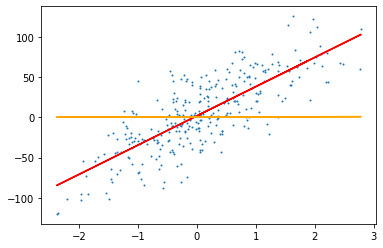

In [124]:
plt.scatter(x,y,s=1)
yp = predict(T[-1], x)
yp1 = predict(T[0], x)
plt.plot(x,yp, 'r')
plt.plot(x,yp1,'orange')


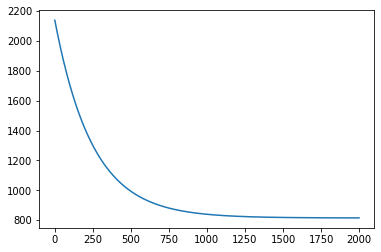

In [128]:
plt.plot(E[:2000])

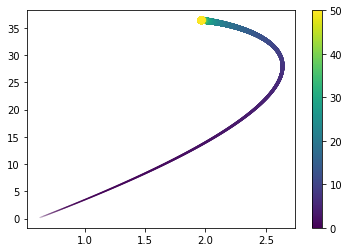

In [126]:
C =np.arange(len(T))/100
plt.scatter(T[:,0], T[:,1], s=C, c=C)
plt.colorbar()